In [1]:
import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt
# for numerical integration
import scipy.integrate as scint

# for interpolation
import scipy.interpolate as scinterp

In [2]:
def x_coord_to_index(x):
    if isinstance(x, list):
        x = np.array(x)
    return (num_x - 1) * (x - px.min()) / (px.max() - px.min())
    
def y_coord_to_index(y):
    if isinstance(y, list):
        y = np.array(y)
    return (num_x - 1) * (y - py.min()) / (py.max() - py.min())

In [3]:
# MODIFICAR AL DE LA TAREA
def u_fun(x, y):
    return None

def Fu_fun(kx, ky):
    return None

In [4]:
num_x = 1024

px = np.linspace(-10, 10, num_x)
py = np.linspace(-10, 10, num_x)

pkx = np.linspace(-1, 1, num_x)
pky = np.linspace(-1, 1, num_x)

[ mx, my ] = np.meshgrid(px, py)

[ mkx, mky ] = np.meshgrid(pkx, pky)

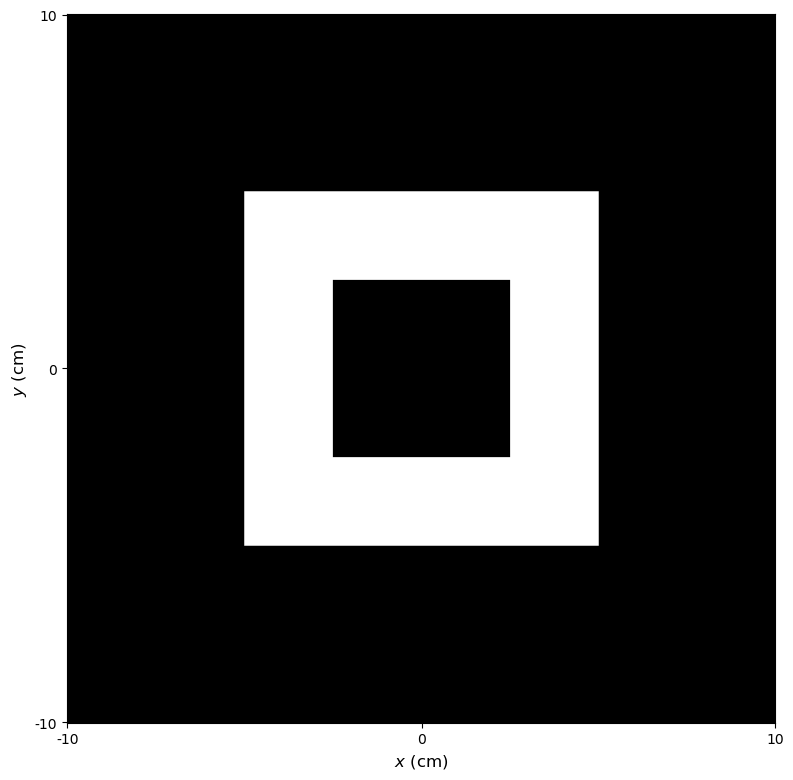

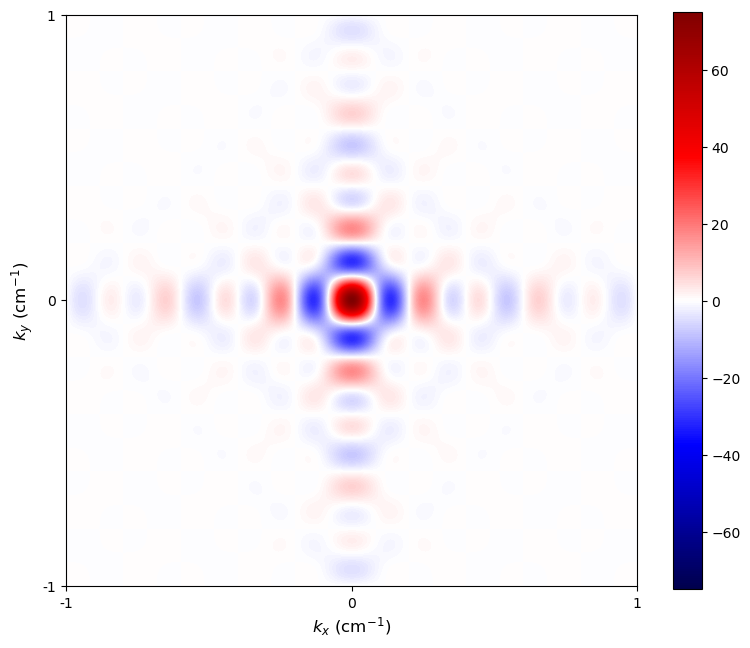

In [5]:
X = u_fun(mx, my)
FX = Fu_fun(mkx, mky)

# indices for ticks
xidx = [ I * num_x // 2 for I in range(2) ] + [ num_x - 1 ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# image + arrow
ax.imshow(X, vmin=0, vmax=1.0, cmap='gray', origin='lower')
ax.set_xlabel('$x$ (cm)', fontsize=12)
ax.set_ylabel('$y$ (cm)', fontsize=12)
ax.set_xticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)
ax.set_yticks(xidx, labels=['{:.0f}'.format(px[I]) for I in xidx ], fontsize=10)

plt.show()

# indices for ticks
xidx = [ I * num_x // 2 for I in range(2) ] + [ num_x - 1 ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# image + arrow
im = ax.imshow(FX, vmin=-75, vmax=75, cmap='seismic', origin='lower')
ax.set_xlabel('$k_x$ (cm$^{-1}$)', fontsize=12)
ax.set_ylabel('$k_y$ (cm$^{-1}$)', fontsize=12)
ax.set_xticks(xidx, labels=['{:.0f}'.format(pkx[I]) for I in xidx ], fontsize=10)
ax.set_yticks(xidx, labels=['{:.0f}'.format(pkx[I]) for I in xidx ], fontsize=10)
plt.colorbar(im, shrink=0.75)


plt.show()

In [6]:
# Modificar valores, con formula idealmente
FOV = [None,None]
dx = [None,None]
dk = [None,None]
N = [None,None]
k_max = [None,None]

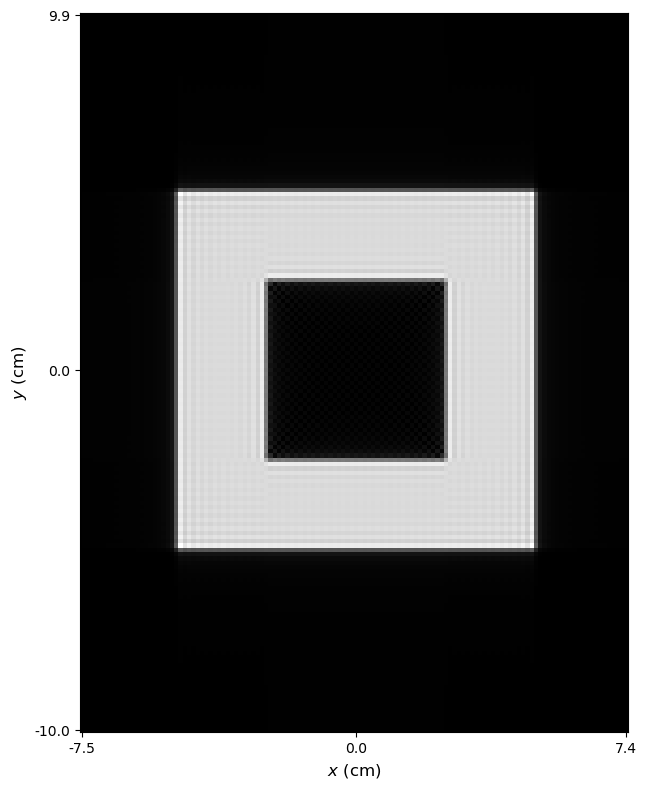

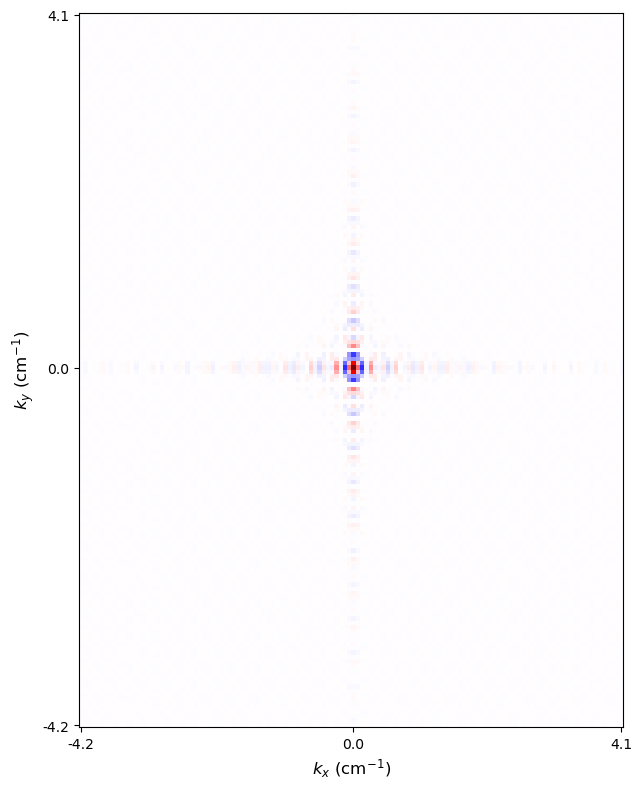

In [7]:
# sampling in k-space
if N[0] % 2 == 0:
    pkx = np.linspace(-k_max[0], k_max[0], N[0], endpoint=False)
    px = np.linspace(-FOV[0] / 2, FOV[0] / 2, N[0], endpoint=False)
else:
    pkx = np.linspace(-k_max[0], k_max[0], N[0])
    px = np.linspace(-FOV[0] / 2, FOV[0] / 2, N[0])
if N[1] % 2 == 0:
    pky = np.linspace(-k_max[1], k_max[1], N[1], endpoint=False)
    py = np.linspace(-FOV[1] / 2, FOV[1] / 2, N[1], endpoint=False)
else:
    pky = np.linspace(-k_max[1], k_max[1], N[1])
    py = np.linspace(-FOV[1] / 2, FOV[1] / 2, N[1])
[ _mkx, _mky ] = np.meshgrid(pkx, pky)

# samples in k-space
S = Fu_fun(_mkx, _mky)

# reconstruction
RX = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(S))) / (dk[0] * dk[1])

# plot
# indices for ticks
xidx = [ I * N[0] // 2 for I in range(2) ] + [ N[0] - 1 ]
yidx = [ I * N[1] // 2 for I in range(2) ] + [ N[1] - 1 ]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# image + arrow
ax.imshow(np.abs(RX), cmap='gray', origin='lower')
ax.set_xlabel('$x$ (cm)', fontsize=12)
ax.set_ylabel('$y$ (cm)', fontsize=12)
ax.set_xticks(xidx, labels=['{:.1f}'.format(px[I]) for I in xidx ], fontsize=10)
ax.set_yticks(yidx, labels=['{:.1f}'.format(py[I]) for I in yidx ], fontsize=10)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((8, 8))
fig.set_tight_layout('tight')

# image + arrow
S_max = np.abs(S).max()
im = ax.imshow(S, cmap='seismic', vmin=-S_max, vmax=+S_max, origin='lower')
ax.set_xlabel('$k_x$ (cm$^{-1}$)', fontsize=12)
ax.set_ylabel('$k_y$ (cm$^{-1}$)', fontsize=12)
ax.set_xticks(xidx, labels=['{:.1f}'.format(pkx[I]) for I in xidx ], fontsize=10)
ax.set_yticks(yidx, labels=['{:.1f}'.format(pky[I]) for I in yidx ], fontsize=10)
# plt.colorbar(im, shrink=0.75)

plt.show()